<a href="https://colab.research.google.com/github/SaulHL08/Notebooks-Datos-Masivos/blob/main/Avance_Evidencia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance 1

*   Adrián Joshua Arias Altamirano
*   Sául Hernández Latiznere
*   ALuis Arturo Hernández Pineda
*   Sául Hernández Latiznere



## Preparación del Ambiente de Python

Prepara el ambiente de Python en el equipo de cómputo donde se realizará la evidencia. Para ello, instala Anaconda mediante los siguientes pasos:

1. Descarga la Suite de Anaconda con Python 3.X desde: [https://www.anaconda.com](https://www.anaconda.com).
2. Instala la Suite.
3. Abre Jupyter notebook desde el explorador de Anaconda.
4. Ingresa un código para imprimir Hello World y corre la celda del código.

## Investigación sobre la Empresa Instacart

La información que será analizada corresponde a los pedidos de los clientes a través del tiempo. Para ello, se cuenta con un dataset anónimo de alrededor de 3 millones de pedidos de aproximadamente 200,000 usuarios de la empresa.

Ingresa a cualquiera de las siguientes ligas para obtener estos datos:

- Kaggle (s.f.). Instacart Market Basket Analysis. Recuperado de [https://www.kaggle.com/c/instacart-market-basket-analysis/data](https://www.kaggle.com/c/instacart-market-basket-analysis/data)
- Instacart (2017). 3 Million Instacart Orders, Open Sourced. Recuperado de [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017)

Para obtener más información sobre este dataset, consulta el siguiente recurso:

- Stanley, J. (2017). 3 Million Instacart Orders, Open Sourced. Recuperado de [https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

## Actividades a Realizar

Una vez que se tengan los datos, realiza lo siguiente:

1. Elabora un diccionario de datos.
2. Diseña un diagrama de datos.
3. Utiliza un Notebook de Jupyter para acceder a los datos y lleva a cabo un análisis descriptivo, el cual incluirá la descripción detallada de cada uno de los archivos de datos.
4. Realizado el análisis anterior, lleva a cabo el entendimiento del negocio, señalando los objetivos del proyecto y la descripción de los datos disponibles.
5. Haz entrega de los archivos electrónicos con las actividades realizadas de los temas 1 y 2.


# **Diccionario de Datos**

**Órdenes (3.4 millones de filas, 206 mil usuarios):**

- `order_id`: identificador de la orden
- `user_id`: identificador del cliente
- `eval_set`: a qué conjunto de evaluación pertenece esta orden (ver CONJUNTO descrito abajo)
- `order_number`: número de secuencia de la orden para este usuario (1 = primera, n = enésima)
- `order_dow`: el día de la semana en que se realizó la orden
- `order_hour_of_day`: la hora del día en que se realizó la orden
- `days_since_prior`: días desde la última orden, limitado a 30 (con NA para `order_number = 1`)

**Productos (50 mil filas):**

- `product_id`: identificador del producto
- `product_name`: nombre del producto
- `aisle_id`: clave externa
- `department_id`: clave externa

**Pasillos (134 filas):**

- `aisle_id`: identificador del pasillo
- `aisle`: el nombre del pasillo

**Departamentos (21 filas):**

- `department_id`: identificador del departamento
- `department`: el nombre del departamento

**Productos de la Orden_SET (más de 30 millones de filas):**

- `order_id`: clave externa
- `product_id`: clave externa
- `add_to_cart_order`: orden en la que se agregó cada producto al carrito
- `reordered`: 1 si este producto ha sido ordenado por este usuario en el pasado, 0 en caso contrario

Donde `SET` es uno de los cuatro siguientes conjuntos de evaluación (`eval_set` en órdenes):

- `"prior"`: órdenes anteriores a la orden más reciente de ese usuario (~3.2 millones de órdenes)
- `"train"`: datos de entrenamiento proporcionados a los participantes (~131 mil órdenes)
- `"test"`: datos de prueba reservados para competencias de aprendizaje automático (~75 mil órdenes)


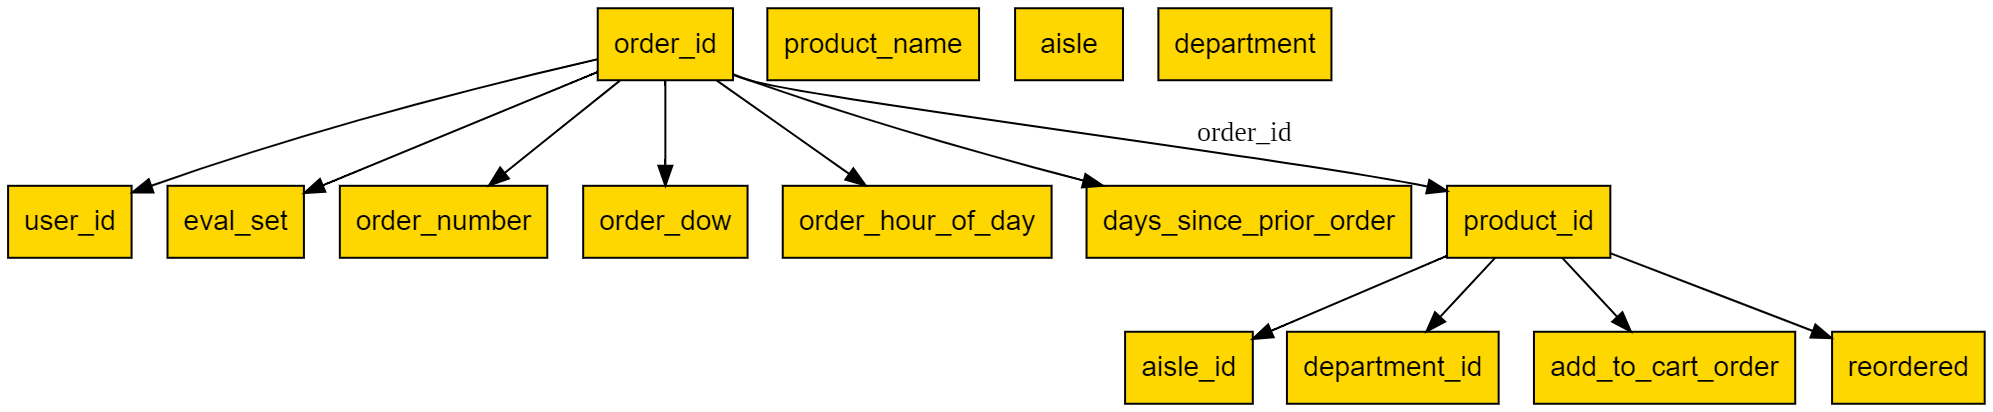

In [ ]:
import pandas as pd
#Analisis descriptivo
# Leer el archivo CSV
df = pd.read_csv('/content/orders.csv')

# Obtener estadísticas descriptivas
descriptive_stats = df[['order_id', 'user_id', 'order_number', 'order_dow',
                        'order_hour_of_day', 'days_since_prior_order']].describe()

print(descriptive_stats)


           order_id       user_id  order_number     order_dow  \
count  2.711465e+06  2.711465e+06  2.711465e+06  2.711465e+06   
mean   1.710639e+06  8.153847e+04  1.714770e+01  2.777328e+00   
std    9.875515e+05  4.707586e+04  1.770915e+01  2.046501e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.554660e+05  4.085600e+04  5.000000e+00  1.000000e+00   
50%    1.710441e+06  8.148000e+04  1.100000e+01  3.000000e+00   
75%    2.566066e+06  1.221710e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  1.633140e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       2.711465e+06            2.548150e+06  
mean        1.345692e+01            1.111089e+01  
std         4.225993e+00            9.202866e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.500000e+01  
max   

### Entendimiento del Negocio:

#### Objetivos del Proyecto:

El objetivo de este proyecto es analizar y comprender los datos de un sistema de pedidos de productos. Se busca obtener información relevante que permita tomar decisiones comerciales más informadas y mejorar la experiencia del cliente. Los principales objetivos incluyen:

1. **Optimización de la Experiencia del Cliente:** Entender los patrones de compra, horarios preferidos y días de la semana para mejorar la disponibilidad de productos y los tiempos de entrega.

2. **Gestión de Inventario:** Analizar la demanda de productos y optimizar la gestión de inventario para evitar faltantes y excedentes.

3. **Segmentación de Clientes:** Identificar diferentes segmentos de clientes basados en su historial de compras para ofrecer promociones y ofertas personalizadas.

4. **Predicción de Recompras:** Utilizar el historial de compras para predecir qué productos son más propensos a ser recomprados por los clientes.

5. **Optimización de Rutas de Entrega:** Analizar los horarios y días de la semana de las órdenes para optimizar las rutas de entrega y reducir costos logísticos.

#### Descripción de los Datos Disponibles:

1. **Órdenes (3.4 millones de filas, 206 mil usuarios):**
   - `order_id`: Identificador único de la orden.
   - `user_id`: Identificador único del cliente.
   - `eval_set`: Conjunto de evaluación al que pertenece la orden (por ejemplo, "prior", "train", "test").
   - `order_number`: Número de secuencia de la orden para este usuario (1 = primera, n = enésima).
   - `order_dow`: Día de la semana en que se realizó la orden.
   - `order_hour_of_day`: Hora del día en que se realizó la orden.
   - `days_since_prior_order`: Días desde la última orden, limitado a 30 (con NA para `order_number = 1`).

2. **Productos (50 mil filas):**
   - `product_id`: Identificador único del producto.
   - `product_name`: Nombre del producto.
   - `aisle_id`: Clave externa que identifica el pasillo al que pertenece el producto.
   - `department_id`: Clave externa que identifica el departamento al que pertenece el producto.

3. **Pasillos (134 filas):**
   - `aisle_id`: Identificador único del pasillo.
   - `aisle`: Nombre del pasillo.

4. **Departamentos (21 filas):**
   - `department_id`: Identificador único del departamento.
   - `department`: Nombre del departamento.

5. **Productos de la Orden_SET (más de 30 millones de filas):**
   - `order_id`: Clave externa que identifica la orden.
   - `product_id`: Clave externa que identifica el producto.
   - `add_to_cart_order`: Orden en la que se agregó cada producto al carrito.
   - `reordered`: 1 si este producto ha sido ordenado por este usuario en el pasado, 0 en caso contrario.

Estos datos proporcionan información detallada sobre las órdenes de productos, los clientes, los productos mismos y su ubicación en el pasillo y departamento. Esta información es esencial para tomar decisiones estratégicas y operativas para el negocio.


# **A Continuación mostramos las actividades que se han realizado**

- **Actividad 1:**
  - [Enlace a la Actividad 1](https://drive.google.com/file/d/1hR8TdJ8Fe8r2i0duE39OLO8IHh_kivV4/view?usp=drive_link)

- **Actividad 2:**
  - [Enlace a la Actividad 2](https://drive.google.com/file/d/1DZINs1WAOypiXpQ_Bxr-R070NWofb2vh/view?usp=drive_link)

- **Actividad 3:**
  - [Enlace a la Actividad 3](https://docs.google.com/document/d/1OZOfF1QOTUZo6oD9z4qy6yhwaBmkb8eo/edit?usp=drive_link&ouid=109424643009060833842&rtpof=true&sd=true)

- **Actividad 4:**
  - [Enlace a la Actividad 4](https://docs.google.com/document/d/17liaB3VsGIiLqGoM7mbWxp2qaz0XrU4N/edit?usp=drive_link&ouid=109424643009060833842&rtpof=true&sd=true)

- **Actividad 5:**
  - [Enlace a la Actividad 5](https://colab.research.google.com/drive/1jgu13RmRuI_Ihlu16Wjjk7HNLA88CSIv?usp=sharing)

- **Titanic Notebook:**
  - [Enlace al Titanic Notebook](https://colab.research.google.com/drive/10sow2xbBAIgApLg9vpExJAO6PcQ68Q5a?usp=sharing)
